## HCP Behavial Data 

In this XP I'll will explore HCP data from different domaine  :
- Demographic
- Physiologic
- Cognitive
- Emotional/Social
- Motor
- Sensory


In [1]:
import os
import numpy as np
import scipy
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
from IPython.display import display

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [5]:
# Load pheno file
path_root = '/media/yassinebha/database29/Drive/HCP/'
#path_root = '/home/yassinebha/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))

# Demographic Domain

In [6]:
behav_demog = ["Age_in_Yrs","Gender","Handedness","Zygosity","Race","Ethnicity","SSAGA_Income","SSAGA_Educ"]
data_demog = data.get(behav_demog)

In [7]:
data_demog.Zygosity.value_counts()

NotTwin    494
NotMZ      250
MZ         225
Name: Zygosity, dtype: int64

In [8]:
# Replace cathegorical variable with numeric value
# Gender -->'M':1,'F':2
# Zygosity --> 'NotTwin':0, 'NotMZ':1, 'MZ':2
# Ethnicity --> 'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2
# Race --> 'White':0, 'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2, 
#          'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 
data_demog.Gender.replace({'M':1,'F':2}, inplace=True)
data_demog.Zygosity.replace({'NotTwin':0, 'NotMZ':1, 'MZ':2}, inplace=True)
data_demog.Ethnicity.replace({'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 
                              'Unknown or Not Reported':2}, inplace=True)
data_demog.Race.replace({'White':0 ,'Black or African Am.':1,
                         'Asian/Nat. Hawaiian/Othr Pacific Is.':2,'More than one':3,
                         'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 }, inplace=True)

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Shapiro-test


,DF,Test Statistic,p-value
Age_in_Yrs,969,0.968613,1.282768e-13
Gender,969,0.631552,2.751029e-41
Handedness,969,0.699805,2.241741e-38
Zygosity,968,0.745477,4.272761e-36
Race,969,0.564953,9.949219e-44
Ethnicity,969,0.322351,0.000000e+00
SSAGA_Income,964,0.927347,3.372751e-21
SSAGA_Educ,968,0.849325,2.215921e-29


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


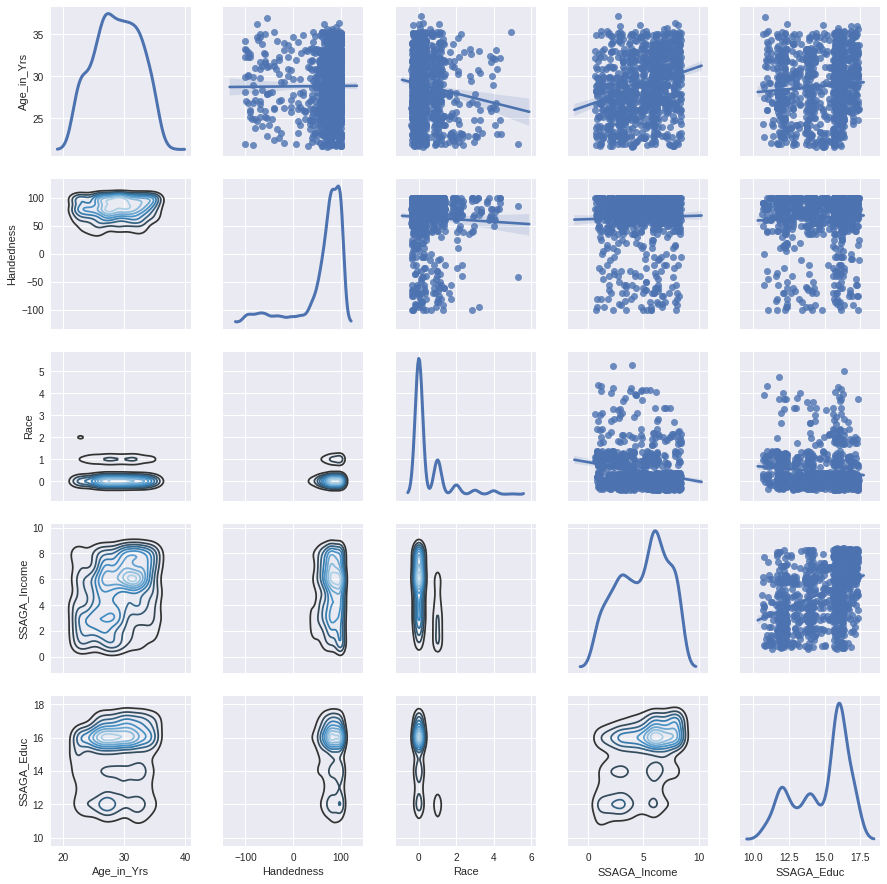

In [9]:
# Test for normality
x = data_demog.Age_in_Yrs.dropna()
y = data_demog.Gender.dropna()
z = data_demog.Handedness.dropna()
u = data_demog.Zygosity.dropna()
v = data_demog.Race.dropna()
w = data_demog.Ethnicity.dropna()
s = data_demog.SSAGA_Income.dropna()
t = data_demog.SSAGA_Educ.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)
shapiro_results_s = scipy.stats.shapiro(s)
shapiro_results_t = scipy.stats.shapiro(t)


dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1,len(s) - 1,len(t) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              shapiro_results_s[0],shapiro_results_t[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       shapiro_results_s[1],shapiro_results_t[1]]}
df = pd.DataFrame(dict_sw,index=["Age_in_Yrs","Gender","Handedness","Zygosity",
                                 "Race","Ethnicity","SSAGA_Income","SSAGA_Educ"])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_demog.get(["Age_in_Yrs","Handedness","Race","SSAGA_Income","SSAGA_Educ"]).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)

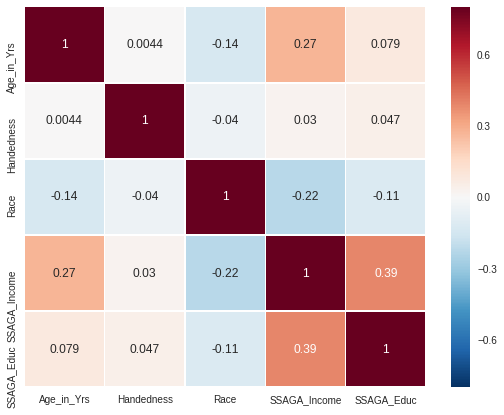

In [10]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data_demog.get(["Age_in_Yrs","Handedness","Race","SSAGA_Income","SSAGA_Educ"]).corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

### The most correlated Demog data

- #### Income and Years of Education

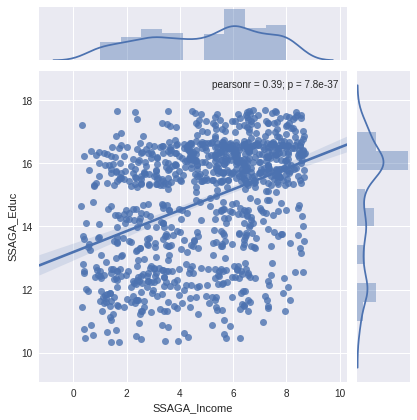

In [11]:
sns.set(color_codes=True)
sns.jointplot(x="SSAGA_Income", y="SSAGA_Educ", x_jitter=.7,y_jitter=.7,data=data_demog,kind="reg");

- ####  Income and Age

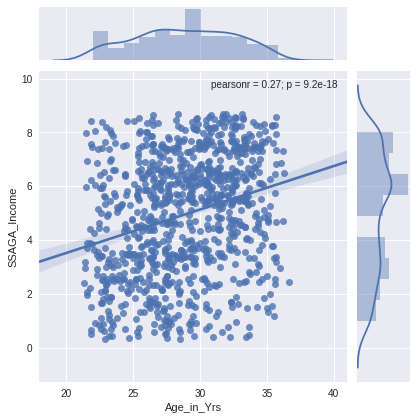

In [12]:
sns.set(color_codes=True)
sns.jointplot(x="Age_in_Yrs", y="SSAGA_Income", data=data_demog, x_jitter=.7,y_jitter=.7,kind='reg');

#### Gender differences 
- **Incomes**

Total household income: 
- <$10,000 = 1
- 10K-19,999 = 2
- 20K-29,999 = 3
- 30K-39,999 = 4
- 40K-49,999 = 5
- 50K-74,999 = 6
- 75K-99,999 = 7
- 100,000 and more = 8

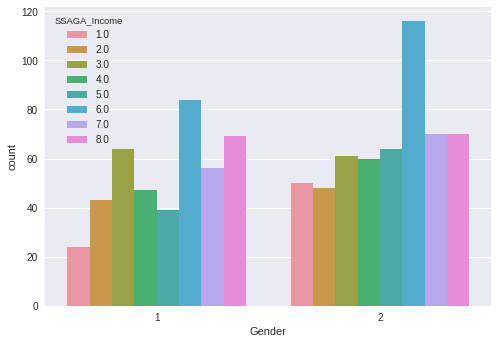

In [13]:
#'Male':1,'Female':2
sns.countplot(x='Gender',hue='SSAGA_Income',data=data_demog)

- **Education**

Years of education completed: <11 = 11; 12; 13; 14; 15; 16; 17+ = 17

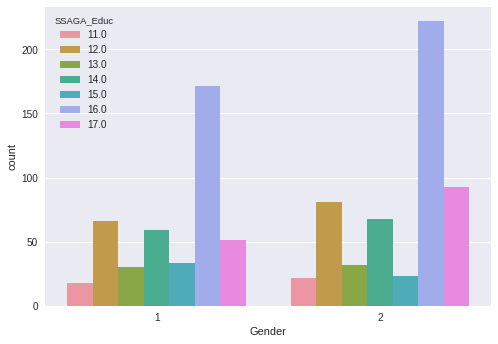

In [14]:
# Gender difference - Education

sns.countplot(x='Gender',hue='SSAGA_Educ',data=data_demog)

# Physiologic Domaine

BMI: Body Mass Index

BPSystolic: Blood Pressure - Systolic

BPDiastolic: Blood Pressure - Diastolic

PSQI_Score: Sleep (Pittsburgh Sleep Questionnaire) 

In [15]:
behav_physio = ["BMI","BPSystolic","BPDiastolic","PSQI_Score"]
data_physio = data.get(behav_physio)
data_physio.describe()

,BMI,BPSystolic,BPDiastolic,PSQI_Score
count,969.000000,951.000000,951.000000,970.000000
mean,27.180454,124.788644,77.345952,5.268041
std,5.887978,15.160632,11.033117,3.023183
min,16.480000,87.000000,28.000000,0.000000
25%,23.000000,114.500000,70.000000,3.000000
50%,25.930000,123.000000,77.000000,5.000000
75%,30.210000,134.000000,84.000000,7.000000
max,48.250000,247.000000,130.000000,19.000000


Shapiro-test


,DF,Test Statistic,p-value
BMI,968,0.932937,1.954226e-20
BPSystolic,950,0.957172,4.754663e-16
BPDiastolic,950,0.987673,3.610366e-07
PSQI_Score,969,0.944920,1.568539e-18


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


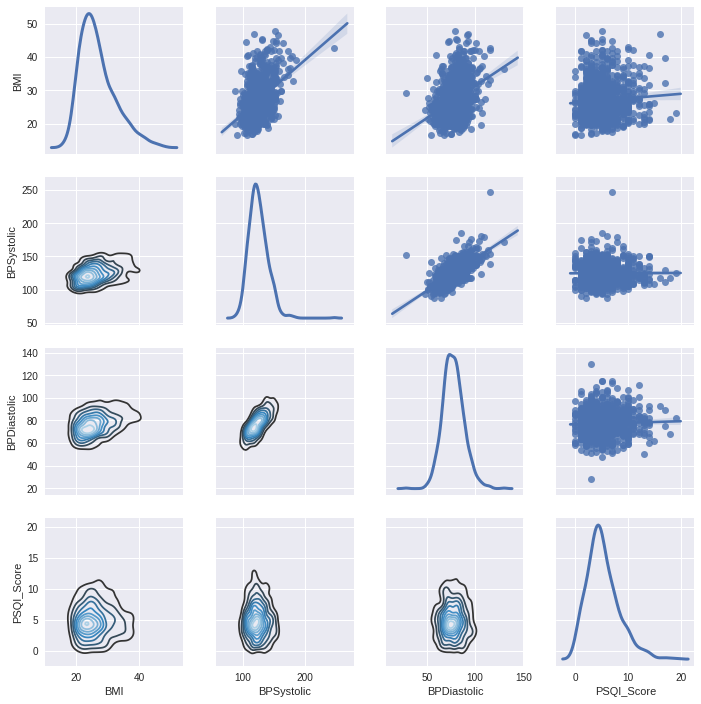

In [16]:
# Test for normality
x = data_physio.BMI.dropna()
y = data_physio.BPSystolic.dropna()
z = data_physio.BPDiastolic.dropna()
u = data_physio.PSQI_Score.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1]]}
df = pd.DataFrame(dict_sw,index=['BMI','BPSystolic','BPDiastolic','PSQI_Score'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_physio.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

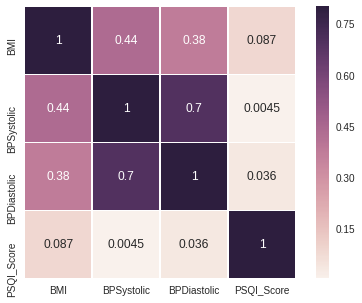

In [17]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_physio.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

### The most correlated Physiodata

**- Systolic and Diastolic Blood Pressure**

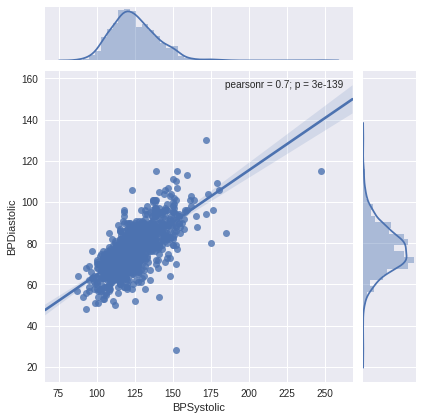

In [18]:
sns.set(color_codes=True)
sns.jointplot(x="BPSystolic", y="BPDiastolic",data=data_physio,kind="reg");

**- BMI and Systolic Blood Pressure**

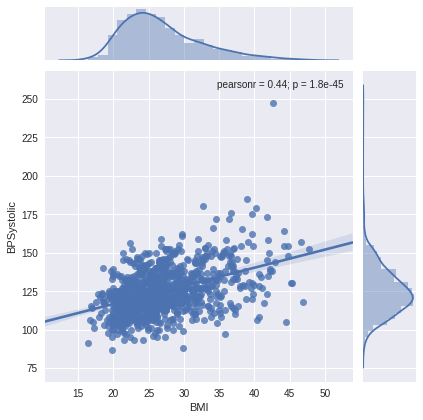

In [25]:
sns.set(color_codes=True)
sns.jointplot(x="BMI", y="BPSystolic",data=data_physio,kind="reg");

# Cognitive Domain

- ### Instrument: Episodic Memory (Picture Sequence Memory)


*The Picture Sequence Memory Test is a measure developed for the Open of episodic memory for ages 3-85 years. It involves recalling increasingly lengthy series of illustrated objects and activities that are presented in a particular order on the computer screen. The participants are asked to recall the sequence of pictures that is demonstrated over two learning trials; sequence length varies from 6-18 pictures, depending on age. Participants are given credit for each adjacent pair of pictures (i.e., if pictures in locations 7 and 8 and placed in that order and adjacent to each other anywhere - such as slots 1 and 2 - one point is awarded) they correctly place, up to the maximum value for the sequence, which is one less than the sequence length (if there are 18 pictures in the sequence, the maximum score is 17, because that is the number of adjacent pairs of pictures that exist). The test takes approximately 7 minutes to administer. This test is recommended for ages 3-85.*

In [26]:
behav_cog_EpMem = ["PicSeq_Unadj"]
data_cog_EpMem = data.get(behav_cog_EpMem)
data_cog_EpMem.describe()

,PicSeq_Unadj
count,969.000000
mean,111.278029
std,13.527188
min,76.420000
25%,102.180000
50%,109.960000
75%,120.320000
max,135.550000


,DF,Test Statistic,p-value
PicSeq_Unadj,968,0.974016,3.810157e-12


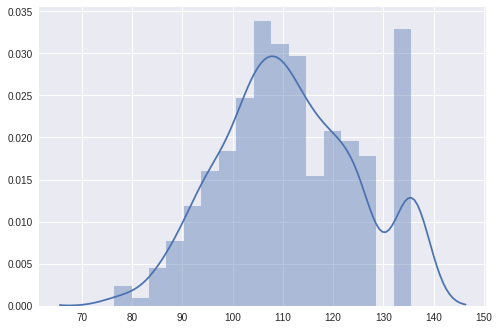

In [27]:
# shapiro test
x = data_cog_EpMem.PicSeq_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)
# Result Table
dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
display(pd.DataFrame(dict_sw,index=['PicSeq_Unadj']))
# Plot distribution
sns.distplot(data_cog_EpMem.loc[~data_cog_EpMem.PicSeq_Unadj.isnull()].PicSeq_Unadj.as_matrix());

- ### Instrument: Executive Function

   - #### Cognitive Flexibility (Dimensional Change Card Sort)
   
   *DCCS is a measure of cognitive flexibility. Two target pictures are presented that vary along two dimensions (e.g., shape and color). Participants are asked to match a series of bivalent test pictures (e.g., yellow balls and blue trucks) to the target pictures, first according to one dimension (e.g., color) and then, after a number of trials, according to the other dimension (e.g., shape). "Switch" trials are also employed, in which the participant must change the dimension being matched. For example, after 4 straight trials matching on shape, the participant may be asked to match on color on the next trial and then go back to shape, thus requiring the cognitive flexibility to quickly choose the correct stimulus. Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 4 minutes to administer. This test is recommended for ages 3-85.*
   
   - #### Inhibition (Flanker Task)
   *The Flanker task measures both a participant's attention and inhibitory control. The test requires the participant to focus on a given stimulus while inhibiting attention to stimuli (fish for ages 3-7 or arrows for ages 8-85) flanking it. Sometimes the middle stimulus is pointing in the same direction as the "flankers" (congruent) and sometimes in the opposite direction (incongruent). Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 3 minutes to administer. This test is recommended for ages 3-85.*

In [28]:
behav_cog_ExFun = ["CardSort_Unadj","Flanker_Unadj"]
data_cog_ExFun = data.get(behav_cog_ExFun)
data_cog_ExFun.describe()

,CardSort_Unadj,Flanker_Unadj
count,967.000000,970.000000
mean,114.636298,112.063784
std,10.327818,9.995911
min,80.940000,84.900000
25%,107.710000,105.230000
50%,114.320000,111.890000
75%,121.300000,118.280000
max,143.940000,142.110000


Shapiro-test


,DF,Test Statistic,p-value
CardSort_Unadj,966,0.994584,0.001526
Flanker_Unadj,969,0.994780,0.001996


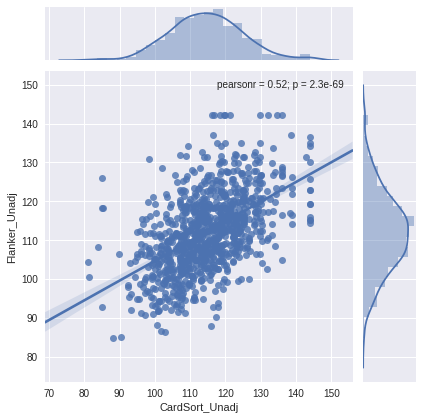

In [29]:
# Test for normality
x = data_cog_ExFun.CardSort_Unadj.dropna()
y = data_cog_ExFun.Flanker_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['CardSort_Unadj','Flanker_Unadj'])
print('Shapiro-test')
display(df)
# plot  dist
sns.jointplot(x="CardSort_Unadj", y="Flanker_Unadj",data=data_cog_ExFun.dropna(),kind="reg");

- ### Instrument: Fluid Intelligence (Penn Progressive Matrices)

    *Fluid intelligence is measured using Raven’s Progressive Matrices (Prabhakaran et al. 1997; Christoff et al. 2001; Gray et al. 2003; Conway et al. 2005; Gray et al. 2005; Wendelken et al. 2008). We use Form A of an abbreviated version of the Raven’s developed by Gur and colleagues (Bilker et al. 2012). Participants are presented with patterns made up of 2x2, 3x3 or 1x5 arrangements of squares, with one of the squares missing. The participant must pick one of five response choices that best fits the missing square on the pattern. The task has 24 items and 3 bonus items, arranged in order of increasing difficulty. However, the task discontinues if the participant makes 5 incorrect responses in a row.
    *
    
    ```
    Number of Correct Responses (PMAT24_A_CR)
    Median Reaction Time for Correct Responses (PMAT24_A_RTCR)```

In [30]:
behav_cog_FluInt = ["PMAT24_A_CR","PMAT24_A_RTCR"]
data_cog_FluInt = data.get(behav_cog_FluInt)
data_cog_FluInt.describe()

,PMAT24_A_CR,PMAT24_A_RTCR
count,964.000000,964.000000
mean,16.428423,15239.259336
std,4.893472,9178.040837
min,4.000000,1989.000000
25%,13.000000,7338.750000
50%,18.000000,14254.500000
75%,20.000000,20787.000000
max,24.000000,61641.000000


Shapiro-test


,DF,Test Statistic,p-value
PMAT24_A_CR,963,0.939192,2.038537e-19
PMAT24_A_RTCR,963,0.937928,1.285344e-19


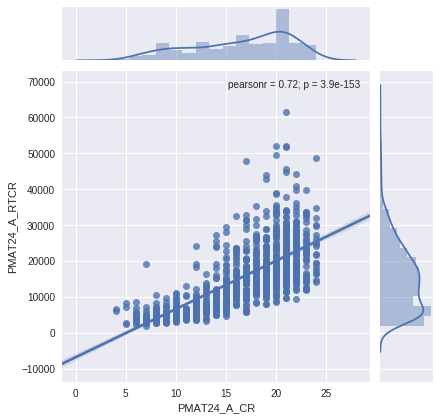

In [31]:
# Test for normality
x = data_cog_FluInt.PMAT24_A_CR.dropna()
y = data_cog_FluInt.PMAT24_A_RTCR.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['PMAT24_A_CR','PMAT24_A_RTCR'])
print('Shapiro-test')
display(df)
# plot  dist
sns.jointplot(x="PMAT24_A_CR", y="PMAT24_A_RTCR",data=data_cog_FluInt.dropna(),kind="reg");

- ### Instrument: Language

  - #### Reading Decoding (Oral Reading Recognition)

    *Separate but parallel reading tests have been developed in English and in Spanish. In either language, the participant is asked to read and pronounce letters and words as accurately as possible. The test administrator scores them as right or wrong. For the youngest children, the initial items require them to identify letters (as opposed to symbols) and to identify a specific letter in an array of 4 symbols. The test is given via a computerized adaptive format and requires approximately 3 minutes. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*
  
  - #### Vocabulary Comprehension (Picture Vocabulary)
   
   *This measure of receptive vocabulary is administered in a computerized adaptive format. The respondent is presented with an audio recording of a word and four photographic images on the computer screen and is asked to select the picture that most closely matches the meaning of the word. This test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [32]:
behav_cog_Lang = ["ReadEng_Unadj","PicVocab_Unadj"]
data_cog_Lang= data.get(behav_cog_Lang)
data_cog_Lang.describe()

,ReadEng_Unadj,PicVocab_Unadj
count,970.000000,970.000000
mean,116.266997,116.232152
std,10.892207,9.813873
min,84.200000,90.690000
25%,109.092600,110.174075
50%,116.840000,116.598500
75%,124.007500,122.839850
max,150.710000,153.088900


Shapiro-test


,DF,Test Statistic,p-value
ReadEng_Unadj,969,0.992754,0.000112
PicVocab_Unadj,969,0.994745,0.001896


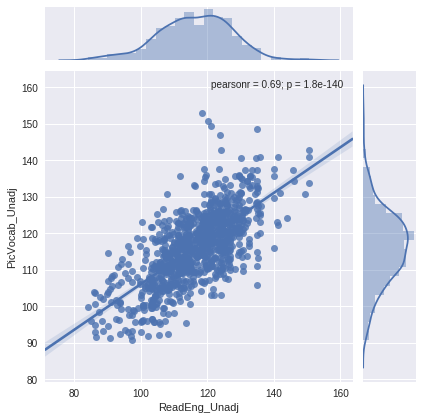

In [33]:
# Test for normality
x = data_cog_Lang.ReadEng_Unadj.dropna()
y = data_cog_Lang.PicVocab_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['ReadEng_Unadj','PicVocab_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj",data=data_cog_Lang.dropna(),kind="reg");

- ### Instrument: Processing Speed (Pattern Completion Processing Speed)
    
    *This test measures speed of processing by asking participants to discern whether two side-by-side pictures are the same or not. Participants' raw score is the number of items correct in a 90-second period. The items are designed to be simple to most purely measure processing speed. The test overall takes approximately 3 minutes to administer. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*

In [34]:
behav_cog_ProcSpee = ["ProcSpeed_Unadj"]
data_cog_ProcSpee= data.get(behav_cog_ProcSpee)
data_cog_ProcSpee.describe()

,ProcSpeed_Unadj
count,970.000000
mean,113.614021
std,14.776429
min,51.620000
25%,104.060000
50%,112.495000
75%,121.625000
max,154.690000


Shapiro-test


,DF,Test Statistic,p-value
ProcSpeed_Unadj,969,0.986923,1.303356e-07


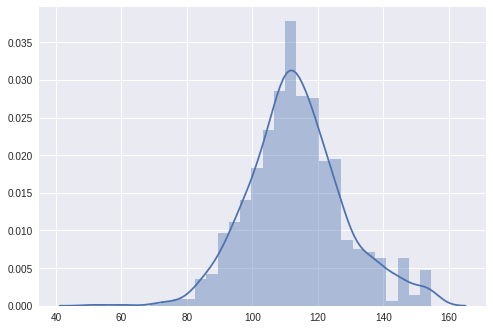

In [35]:
x = data_cog_ProcSpee.ProcSpeed_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['ProcSpeed_Unadj']))

# Plot distribution
sns.distplot(data_cog_ProcSpee.ProcSpeed_Unadj.as_matrix());

- ### Instrument: Self-regulation/Impulsivity (Delay Discounting)

    *Delay discounting describes the undervaluing of rewards that are delayed in time. It is illustrated by the fact that humans (and other animals) will often choose a smaller immediate reward over an objectively larger, but delayed reward. We use a version of the discounting task that identifies ‘indifference points’ at which a person is equally likely to choose a smaller reward (e.g., $100) sooner versus a larger reward later (e.g., $200 in 3 years). Based on the work of Green and Myerson (Estle et al. 2006; Green et al. 2007), we use an adjusting-amount approach, in which delays are fixed and reward amounts are adjusted on a trial-by-trial basis based on participants’ choices, to rapidly hone in on indifference points. This approach has been repeatedly validated to provide reliable estimates of delay discounting (Estle et al. 2006). As a summary measure, we use an area-under-the-curve discounting measure (AUC) that provides a valid and reliable index of how steeply an individual discounts delayed rewards (Myerson et al. 2001).
*

```
DDisc_AUC_200: Area Under the Curve for Discounting of $200
DDisc_AUC_40K: Area Under the Curve for Discounting of $40,000```

In [36]:
behav_cog_SelfReg = ["DDisc_AUC_200","DDisc_AUC_40K"]
data_cog_SelfReg= data.get(behav_cog_SelfReg)
data_cog_SelfReg.describe()

,DDisc_AUC_200,DDisc_AUC_40K
count,964.000000,964.000000
mean,0.248377,0.488202
std,0.202812,0.288475
min,0.015692,0.015625
25%,0.096942,0.238281
50%,0.188869,0.476628
75%,0.329884,0.744792
max,0.984442,0.984375


Shapiro-test


,DF,Test Statistic,p-value
DDisc_AUC_200,963,0.863473,3.930351e-28
DDisc_AUC_40K,963,0.950971,2.186620e-17


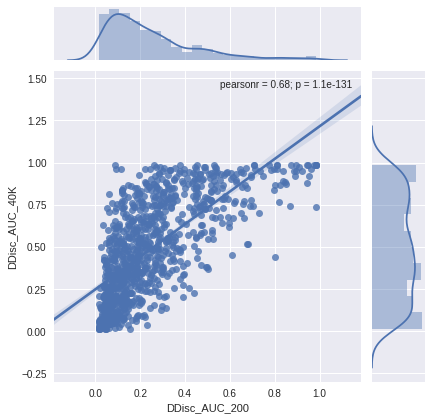

In [37]:
# Test for normality
x = data_cog_SelfReg.DDisc_AUC_200.dropna()
y = data_cog_SelfReg.DDisc_AUC_40K.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['DDisc_AUC_200','DDisc_AUC_40K'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="DDisc_AUC_200", y="DDisc_AUC_40K",data=data_cog_SelfReg.dropna(),kind="reg");

- ### Instrument: Spatial Orientation (Variable Short Penn Line Orientation Test)

     *Spatial orientation processing is measured using the Variable Short Penn Line Orientation Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown two lines with different orientations. They have to rotate one of the lines (a moveable blue one) so that is parallel to the other line (a fixed red line). The rotation of the blue line is accomplished by clicking buttons on the keyboard that rotate the lines either clockwise or counterclockwise. Across trials, the lines vary in their relative location on the screen, though the distance between the centers of the two lines is always the same. The length of the red line is always the same, but the length of the blue line can be either short or long. There are a total of 24 trials*
     
```
VSPLOT_TC: Total Number Correct
VSPLOT_CRTE: Median Reaction Time Divided by Expected Number of Clicks for Correct ```

In [38]:
behav_cog_SpacOri = ["VSPLOT_TC","VSPLOT_CRTE"]
data_cog_SpacOri= data.get(behav_cog_SpacOri)
data_cog_SpacOri.describe()

,VSPLOT_TC,VSPLOT_CRTE
count,963.000000,963.000000
mean,14.587747,1150.712112
std,4.520378,356.623313
min,1.000000,493.086360
25%,12.000000,913.830400
50%,15.000000,1101.909000
75%,18.000000,1322.119000
max,26.000000,3255.687500


Shapiro-test


,DF,Test Statistic,p-value
VSPLOT_TC,962,0.986812,1.281947e-07
VSPLOT_CRTE,962,0.920622,4.358883e-22


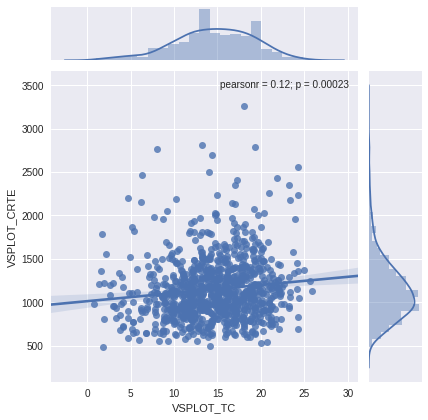

In [39]:
# Test for normality
x = data_cog_SpacOri.VSPLOT_TC.dropna()
y = data_cog_SpacOri.VSPLOT_CRTE.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['VSPLOT_TC','VSPLOT_CRTE'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="VSPLOT_TC", y="VSPLOT_CRTE",data=data_cog_SpacOri.dropna(),kind="reg",x_jitter=.4);

- ### Instrument: Sustained Attention (Short Penn Continuous Performance Test)
    
    *Continuous sustained attention is measured using the Short Penn Continuous Performance Test (Number/Letter Version) (Gur et al. 2001; Gur et al. 2001; Gur et al. 2010). Participants see vertical and horizontal red lines flash on the computer screen. In one block, they must press the spacebar when the lines form a number and in the other block they press the spacebar when the lines form a letter. The lines are displayed for 300 ms followed by a 700 ms ITI. Each block contains 90 stimuli and lasts for 1.5 minutes.*


```SCPT_TPRT:  Short Penn CPT Median Response Time for True Positive Responses
SCPT_SEN: Short Penn CPT Sensitivity = SCPT_TP/(SCPT_TP + SCPT_FN)
SCPT_SPEC: Short Penn CPT Specificity = SCPT_TN/(SCPT_TN + SCPT_FP)```

In [40]:
behav_cog_SusAtt = ["SCPT_TPRT","SCPT_SEN","SCPT_SPEC"]
data_cog_SusAtt= data.get(behav_cog_SusAtt)
data_cog_SusAtt.describe()

,SCPT_TPRT,SCPT_SEN,SCPT_SPEC
count,962.000000,964.000000,964.000000
mean,472.976611,0.953126,0.953622
std,42.751249,0.071077,0.036560
min,360.000000,0.000000,0.766700
25%,442.250000,0.933300,0.933300
50%,470.000000,0.966700,0.958300
75%,500.000000,0.983300,0.983300
max,650.000000,1.000000,1.000000


Shapiro-test


,DF,Test Statistic,p-value
SCPT_TPRT,961,0.979843,2.835092e-10
SCPT_SEN,963,0.549115,3.643376e-44
SCPT_SPEC,963,0.879523,1.133647e-26


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


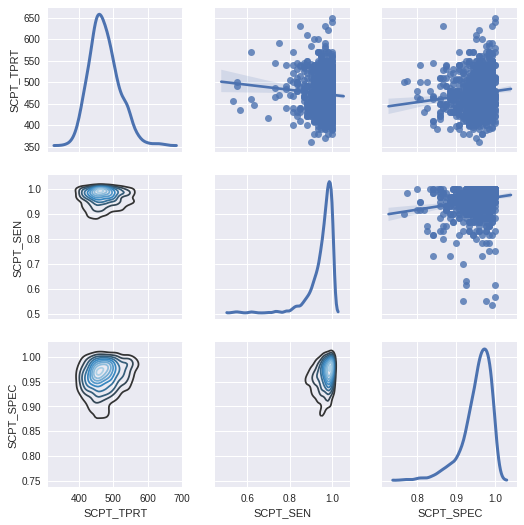

In [41]:
# Test for normality
x = data_cog_SusAtt.SCPT_TPRT.dropna()
y = data_cog_SusAtt.SCPT_SEN.dropna()
z = data_cog_SusAtt.SCPT_SPEC.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1]]}
df = pd.DataFrame(dict_sw,index=['SCPT_TPRT','SCPT_SEN','SCPT_SPEC'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_cog_SusAtt.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

- ### Instrument: Verbal Episodic Memory (Penn Word Memory Test)

    *Verbal episodic memory is measured using Form A of the Penn Word Memory Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown 20 words and asked to remember them for a subsequent memory test. They are then shown 40 words (the 20 previously presented words and 20 new words matched on memory related characteristics). They decide whether they have seen the word previously by choosing among “definitely yes,” “probably yes,” “probably no,” and “definitely no.”*

```
IWRD_TOT: Total Number of Correct Responses
IWRD_RTC: Median Reaction Time for Correct Responses
```

In [42]:
behav_cog_EpiMem = ["IWRD_TOT","IWRD_RTC"]
data_cog_EpiMem= data.get(behav_cog_EpiMem)
data_cog_EpiMem.describe()

,IWRD_TOT,IWRD_RTC
count,964.000000,964.000000
mean,35.484440,1564.383299
std,2.985386,295.503640
min,22.000000,987.500000
25%,34.000000,1373.687500
50%,36.000000,1520.625000
75%,38.000000,1690.000000
max,40.000000,3459.250000


Shapiro-test


,DF,Test Statistic,p-value
IWRD_TOT,963,0.944945,1.827035e-18
IWRD_RTC,963,0.881495,1.754165e-26


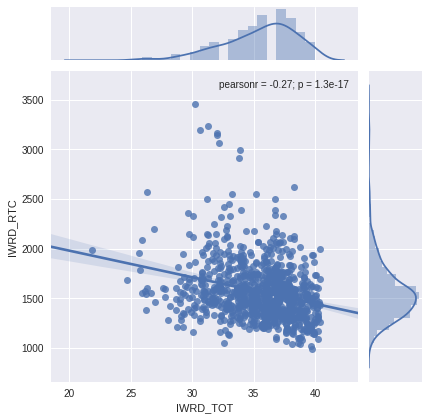

In [43]:
# Test for normality
x = data_cog_EpiMem.IWRD_TOT.dropna()
y = data_cog_EpiMem.IWRD_RTC.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['IWRD_TOT','IWRD_RTC'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="IWRD_TOT", y="IWRD_RTC",data=data_cog_EpiMem.dropna(),kind="reg",x_jitter=.4);

# Emotional Domaine

- ### Instrument: Emotion Recognition (Penn Emotion Recognition Test)

   *Emotion processing is measured using the Penn Emotion Recognition Test (Gur et al. 2001a; Gur et al. 2010). Participants are presented with 40 faces, one at a time. They are asked to choose what emotion the face is showing from five choices: Happy, Sad, Angry, Scared and No Feeling. Half of the faces are males and half are females. There are 8 faces each that have a happy, sad, angry, scared or no feeling expression.* 
   
```
ER40_CR: Number of Correct Responses
ER40_CRT: Correct Responses Median Response Time (ms)```
    

In [44]:
behav_emot_EmoRec = ["ER40_CR","ER40_CRT"]
data_emot_EmoRec= data.get(behav_emot_EmoRec)
data_emot_EmoRec.describe()

,ER40_CR,ER40_CRT
count,964.000000,964.000000
mean,35.537344,1842.682573
std,2.549134,331.810456
min,24.000000,1248.000000
25%,34.000000,1614.500000
50%,36.000000,1780.000000
75%,37.000000,2010.000000
max,40.000000,5020.000000


Shapiro-test


,DF,Test Statistic,p-value
ER40_CR,963,0.935125,4.732675e-20
ER40_CRT,963,0.872291,2.393359e-27


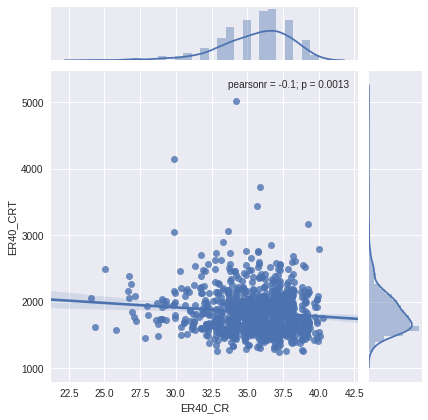

In [45]:
# Test for normality
x = data_emot_EmoRec.ER40_CR.dropna()
y = data_emot_EmoRec.ER40_CRT.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['ER40_CR','ER40_CRT'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="ER40_CR", y="ER40_CRT",data=data_emot_EmoRec.dropna(),kind="reg",x_jitter=.4);

- ### Instrument: Negative Affect

    - __Sadness_Unadj__: *Sadness is a concept within the Negative Affect subdomain of Emotion. Sadness is distinguished by low levels of positive affect and comprised of symptoms that are primarily affective (poor mood) and cognitive (negative perceptions of self, the world, and the future) indicators of depression. The NIH Toolbox Sadness Survey is a CAT comprised of items from the PROMIS Depression Item Bank.*
    
    - __FearAffect_Unadj__: *Fear is a concept within the Negative Affect subdomain of Emotion. Fear is best characterized by symptoms of anxiety that reflect autonomic arousal and perceptions of threat. The NIH Toolbox Fear-Affect Survey is a CAT comprised of items from the PROMIS Anxiety Item Bank. It assesses self-reported fear and anxious misery.*
    
    - __FearSomat_Unadj__:*Fear is a concept within the Negative Affect subdomain of Emotion. Fear is best characterized by symptoms of anxiety that reflect autonomic arousal and perceptions of threat. The NIH Toolbox Fear-Somatic Arousal Survey is a 6-item calibrated scale comprised of items from the Mood and Anxiety Symptom Questionnaire. It assesses somatic symptoms related to arousal.*
    
    - __AngAffect_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*
    
    - __AngHostil_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*
    
    - __AngAggr_Unadj__: *Anger is a concept within the Negative Affect subdomain of Emotion. Anger is characterized by attitudes of hostility and cynicism and is often associated with experiences of frustration impeding goal-directed behavior. For adult self-report (ages 18 and above), Anger is comprised of three components:  anger as an emotion, aggression as a behavioral component, and hostility as a set of cynical attitudes and mistrust of others and their motives. The NIH Toolbox Anger-Affect Survey is a computer-adaptive test (CAT) comprised of items from the PROMIS Anger Item Bank. It assesses anger as an emotion.*

In [46]:
behav_emot_NegAff = ["Sadness_Unadj","FearSomat_Unadj","FearAffect_Unadj",
                     "AngAggr_Unadj","AngHostil_Unadj","AngAffect_Unadj"]
data_emot_NegAff= data.get(behav_emot_NegAff)
data_emot_NegAff.describe()

,Sadness_Unadj,FearSomat_Unadj,FearAffect_Unadj,AngAggr_Unadj,AngHostil_Unadj,AngAffect_Unadj
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,46.420124,51.935088,50.210010,52.006295,50.388958,47.908566
std,8.018563,8.304480,8.058258,8.926732,8.572497,8.397202
min,34.200000,40.100000,32.900000,43.400000,36.600000,28.600000
25%,41.800000,45.300000,46.000000,43.400000,43.600000,42.900000
50%,46.100000,51.700000,51.200000,51.600000,50.600000,48.200000
75%,51.000000,57.400000,54.900000,58.400000,56.900000,53.200000
max,78.100000,87.500000,84.900000,83.100000,74.000000,85.400000


Shapiro-test


,DF,Test Statistic,p-value
Sadness_Unadj,968,0.959642,1.056106e-15
FearSomat_Unadj,968,0.957648,4.012003e-16
FearAffect_Unadj,968,0.979296,1.652530e-10
AngAggr_Unadj,968,0.860842,1.998375e-28
AngHostil_Unadj,968,0.973148,2.151712e-12
AngAffect_Unadj,968,0.987625,2.710011e-07


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


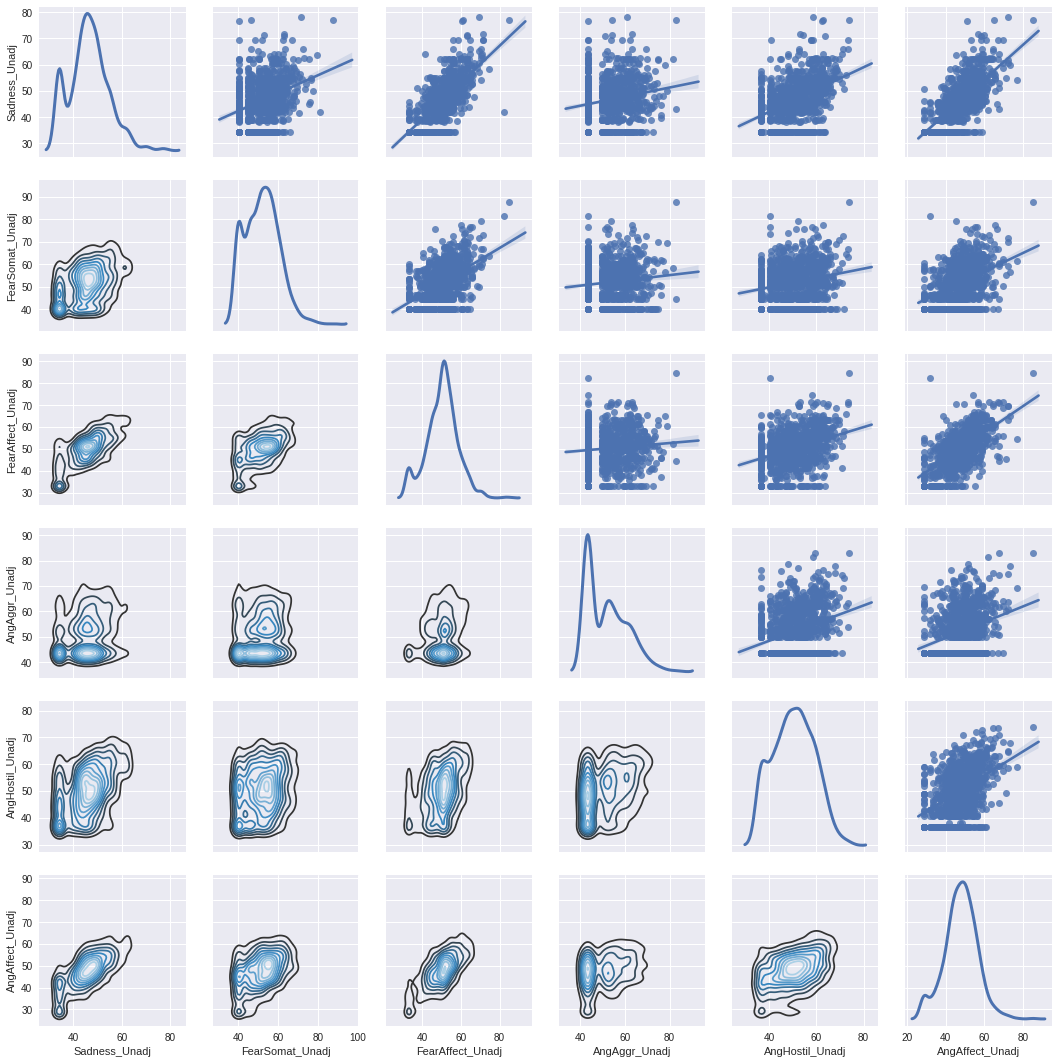

In [47]:
# Test for normality
x = data_emot_NegAff.Sadness_Unadj.dropna()
y = data_emot_NegAff.FearSomat_Unadj.dropna()
z = data_emot_NegAff.FearAffect_Unadj.dropna()
u = data_emot_NegAff.AngAggr_Unadj.dropna()
v = data_emot_NegAff.AngHostil_Unadj.dropna()
w = data_emot_NegAff.AngAffect_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0],shapiro_results_w[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1],shapiro_results_w[1]]}
df = pd.DataFrame(dict_sw,index=['Sadness_Unadj','FearSomat_Unadj','FearAffect_Unadj',
                                 'AngAggr_Unadj','AngHostil_Unadj','AngAffect_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_NegAff.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

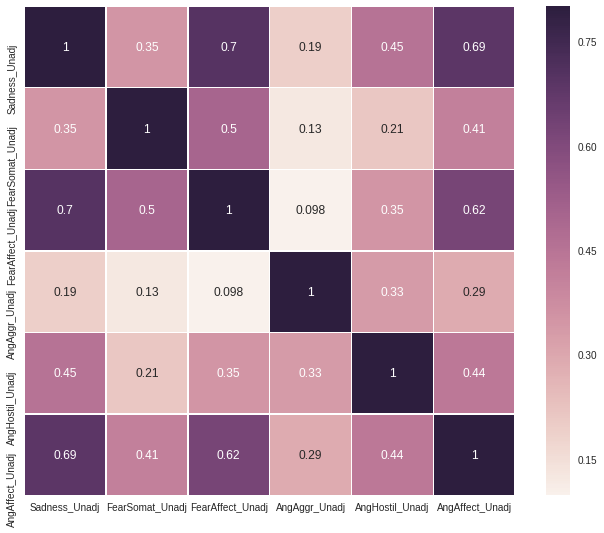

In [48]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_emot_NegAff.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

- ### Instrument: Psychological Well-being

    - **LifeSatisf_Unadj**: *Life Satisfaction is a concept within the Psychological Well-Being subdomain of Emotion. Life Satisfaction is one's cognitive evaluation of life experiences and is concerned with whether people like their lives or not. Life satisfaction includes both general (e.g., my life is going well) and domain-specific (e.g., I am satisfied with my family life) aspects. This self-report measure for adults (ages 18 and above) is a 10-item calibrated scale comprised of items from the Satisfaction with Life Scale  and the Students' Life Satisfaction Scale.  It assesses global feelings and attitudes about one's life.*
    
    - __MeanPurp_Unadj__: *Meaning and Purpose is a concept within the Psychological Well-Being subdomain of Emotion. Meaning and Purpose is characterized by the extent to which people feel their life matters or makes sense. This self-report measure for adults (ages 18 and above) is a CAT comprised of items from the Meaning in Life Questionnaire, the Life Engagement Test, the MHI, and the FACIT-Sp.*
    
    - __PosAffect_Unadj__: *Positive Affect is a concept within the Psychological Well-Being subdomain of Emotion. Positive Affect can be described as feelings that reflect a level of pleasurable engagement with the environment such as happiness, joy, excitement, enthusiasm, and contentment. This parent-report measure (for children ages 8-12) is a CAT comprised of items from the PANAS-X. It assesses both 
    

In [52]:
behav_emot_WellBein = ["LifeSatisf_Unadj","MeanPurp_Unadj","PosAffect_Unadj"]
data_emot_WellBein= data.get(behav_emot_WellBein)
data_emot_WellBein.describe()

,LifeSatisf_Unadj,MeanPurp_Unadj,PosAffect_Unadj
count,969.000000,969.000000,969.000000
mean,54.214964,51.851290,50.040041
std,9.245036,8.841796,7.874815
min,23.700000,29.400000,21.900000
25%,48.000000,46.100000,44.700000
50%,55.000000,50.900000,50.200000
75%,60.100000,57.700000,54.700000
max,74.600000,71.600000,71.600000


Shapiro-test


,DF,Test Statistic,p-value
LifeSatisf_Unadj,968,0.991829,3.384641e-05
MeanPurp_Unadj,968,0.988005,4.031163e-07
PosAffect_Unadj,968,0.984873,1.819461e-08


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


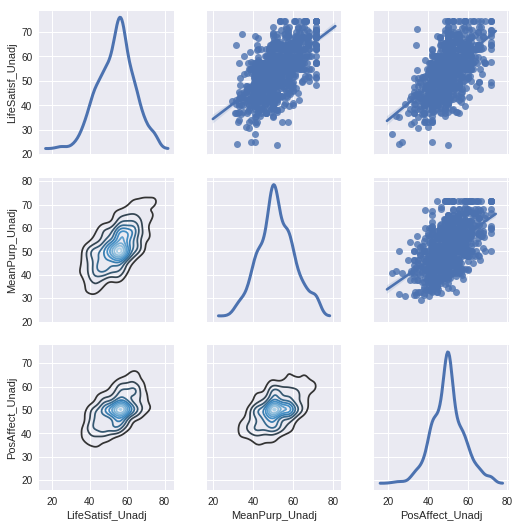

In [53]:
# Test for normality
x = data_emot_WellBein.LifeSatisf_Unadj.dropna()
y = data_emot_WellBein.MeanPurp_Unadj.dropna()
z = data_emot_WellBein.PosAffect_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1]]}
df = pd.DataFrame(dict_sw,index=['LifeSatisf_Unadj','MeanPurp_Unadj','PosAffect_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_WellBein.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

- ### Instrument: Social Relationships

    - __Friendship_Unadj__: *Companionship is a concept within the Social Relationships subdomain of Emotion. Companionship is characterized by self-reported perceptions of the availability of friends or companions with whom to interact or affiliate (i.e., friendship) and that one is alone, lonely or socially isolated from others (i.e., loneliness).  The NIH Toolbox Friendship Survey is a self-report measure for adults (ages 18 and above) comprised of 5 calibrated items.*
    
    - __Loneliness_Unadj__: *Companionship is a concept within the Social Relationships subdomain of Emotion. Companionship is characterized by self-reported perceptions of the availability of friends or companions with whom to interact or affiliate (i.e., friendship) and that one is alone, lonely or socially isolated from others (i.e., loneliness).  The NIH Toolbox Loneliness Survey is a self-report measure for adults (ages 18 and above) comprised of 8 calibrated items.*
    
    - __PercHostil_Unadj__: *Social Distress is a concept within the Social Relationships subdomain of Emotion. Social distress is the extent to which an individual perceives his/her daily social interactions as negative or distressing.  This can include aspects of perceived hostility (e.g., how often people argue with me, yell at me, or criticize me) and perceived rejection (e.g., how often people don't listen when I ask for help, or don't pay attention to me). The NIH Toolbox Perceived Hostility Survey is a self-report measure for children and adolescents (ages 8-17) comprised of 5 calibrated items.*
    
    - __PercReject_Unadj__: *Social Distress is a concept within the Social Relationships subdomain of Emotion. Social distress is the extent to which an individual perceives his/her daily social interactions as negative or distressing.  This can include aspects of perceived hostility (e.g., how often people argue with me, yell at me, or criticize me) and perceived rejection (e.g., how often people don't listen when I ask for help, or don't pay attention to me). The NIH Toolbox Perceived Rejection Survey is a self-report measure for children and adolescents (ages 8-17) comprised of 5 calibrated items.*
    
    - __EmotSupp_Unadj__: *Social Support is a concept within the Social Relationships subdomain of Emotion. Perceived social support is the extent to which an individual views his/her social relationships as available to provide aid in times of need or when problems arise (Cohen, 2004).   This includes emotional/informational types of perceived social support for children and adolescents. Emotional Support refers to the perception that people in one's social network are available to listen to one's problems with empathy, caring and understanding, and Informational Support refers to the perception that people in one's social network are available to provide information or advice needed to solve problems that arise.  This self-report measure for children and adolescents (ages 8-17) is a 7-item calibrated scale.*
    
    - __InstruSupp_Unadj__: *Social Support is a concept within the Social Relationships subdomain of Emotion. Perceived social support is the extent to which an individual views his/her social relationships as available to provide aid in times of need or when problems arise. This includes instrumental and emotional/informational types of perceived social support. Instrumental Support refers to the perception that people in one's social network are available to provide material or functional aid in completing daily tasks (such as making meals or providing transportation) if needed. This self-report measure for adults (ages 18 and above) is an 8-item calibrated scale.*

In [54]:
behav_emot_SocRel = ["Friendship_Unadj","Loneliness_Unadj","PercHostil_Unadj",
                     "PercReject_Unadj","EmotSupp_Unadj","InstruSupp_Unadj"]
data_emot_SocRel= data.get(behav_emot_SocRel)
data_emot_SocRel.describe()

,Friendship_Unadj,Loneliness_Unadj,PercHostil_Unadj,PercReject_Unadj,EmotSupp_Unadj,InstruSupp_Unadj
count,969.000000,969.000000,969.000000,969.000000,968.000000,968.000000
mean,50.337255,51.116099,48.624252,48.747678,51.301033,48.120764
std,9.186610,8.845163,8.670738,9.036844,9.795881,9.087598
min,20.800000,37.600000,33.500000,35.900000,15.900000,22.100000
25%,44.600000,44.900000,43.700000,40.700000,44.800000,42.500000
50%,49.800000,52.000000,49.300000,50.000000,51.800000,46.900000
75%,56.200000,56.200000,53.900000,54.100000,62.500000,54.325000
max,66.500000,82.900000,85.600000,85.300000,62.500000,62.900000


Shapiro-test


,DF,Test Statistic,p-value
Friendship_Unadj,968,0.980982,6.250830e-10
Loneliness_Unadj,968,0.956666,2.520746e-16
PercHostil_Unadj,968,0.970053,3.086238e-13
PercReject_Unadj,968,0.939084,1.733355e-19
EmotSupp_Unadj,967,0.916510,1.126354e-22
InstruSupp_Unadj,967,0.967365,6.478880e-14


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


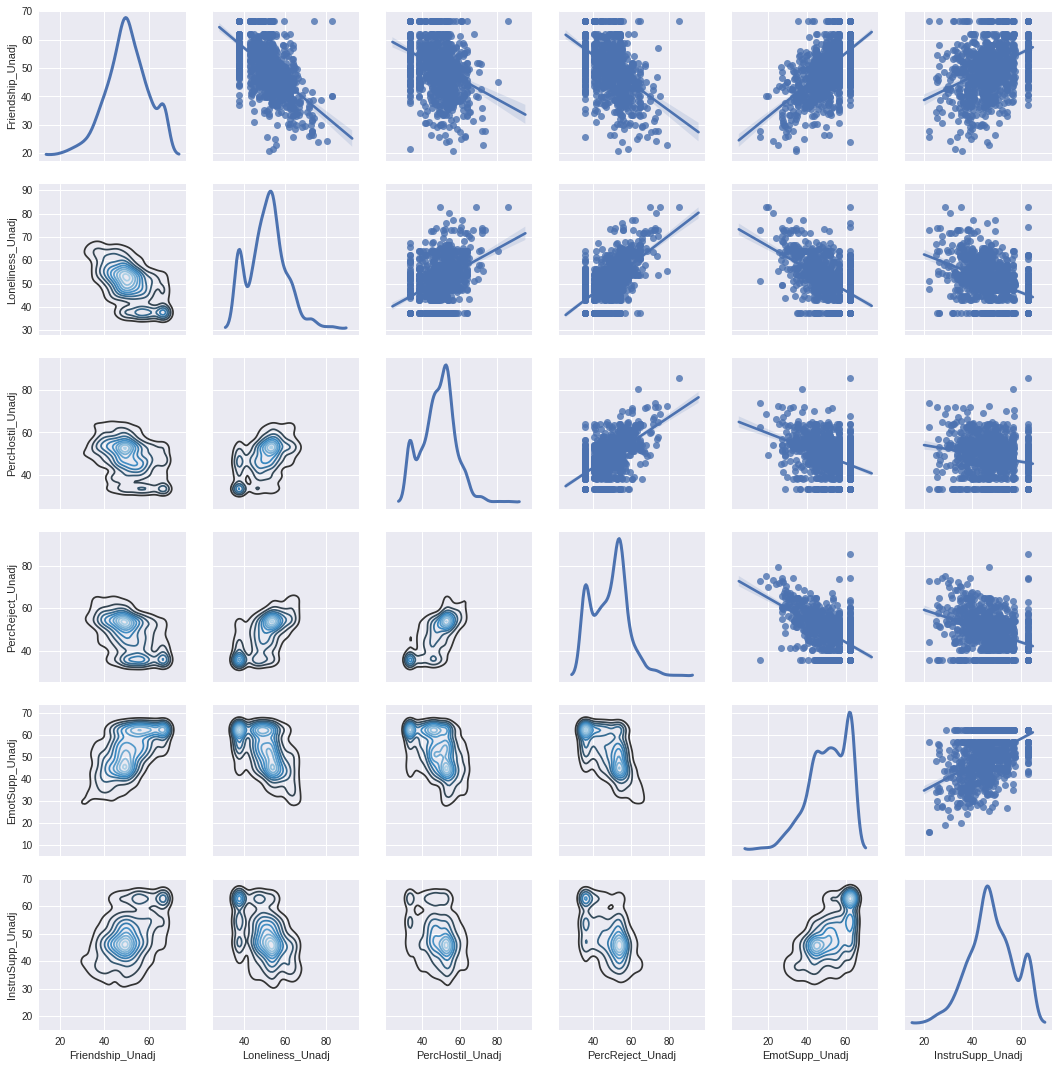

In [55]:
# Test for normality
x = data_emot_SocRel.Friendship_Unadj.dropna()
y = data_emot_SocRel.Loneliness_Unadj.dropna()
z = data_emot_SocRel.PercHostil_Unadj.dropna()
u = data_emot_SocRel.PercReject_Unadj.dropna()
v = data_emot_SocRel.EmotSupp_Unadj.dropna()
w = data_emot_SocRel.InstruSupp_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1,len(w) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0],shapiro_results_w[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1],shapiro_results_w[1]]}
df = pd.DataFrame(dict_sw,index=['Friendship_Unadj','Loneliness_Unadj','PercHostil_Unadj',
                                 'PercReject_Unadj','EmotSupp_Unadj','InstruSupp_Unadj'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_emot_SocRel.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

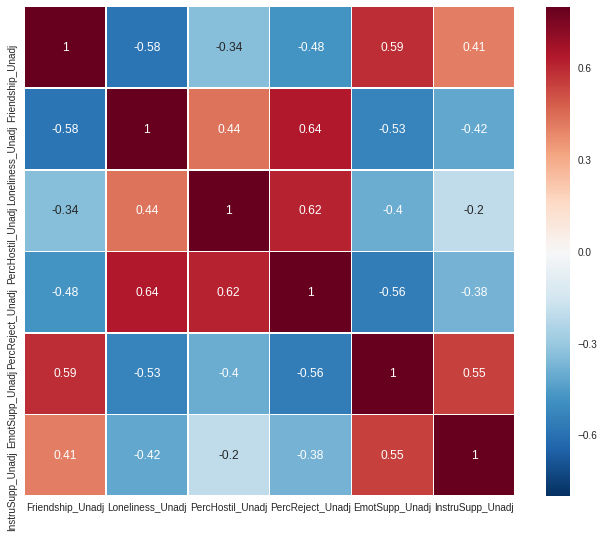

In [56]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_emot_SocRel.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

- ### Instrument: Stress and Self Efficacy

    - __PercStress_Unadj__: *Perceived Stress is a concept within the Stress & Self-Efficacy subdomain of Emotion. Perceived Stress is defined by individual perceptions about the nature of events and their relationship to the values and coping resources of an individual. This self-report measure for adults (ages 18 and above) is a CAT comprised of items from the Perceived Stress Scale-10. . It assesses how unpredictable, uncontrollable, and overloading respondents find their lives.*
    
    - __SelfEff_Unadj__: *Self-Efficacy is a concept within the Stress & Self-Efficacy subdomain of Emotion. Self-Efficacy can be described as a person's belief in their capacity to manage their functioning and have control over meaningful events. This self-report measure for adults (ages 18 and above) is a CAT comprised of items modified from the General Self-Efficacy Scale (Schwarzer). It assesses respondents' sense of global self-efficacy.*

In [57]:
behav_emot_SelfEff = ["PercStress_Unadj","SelfEff_Unadj"]
data_emot_SelfEff= data.get(behav_emot_SelfEff)
data_emot_SelfEff.describe()

,PercStress_Unadj,SelfEff_Unadj
count,969.000000,969.000000
mean,48.296285,50.763777
std,9.105382,8.385369
min,22.400000,24.100000
25%,42.600000,45.500000
50%,48.000000,49.400000
75%,54.100000,56.400000
max,80.500000,68.400000


Shapiro-test


,DF,Test Statistic,p-value
PercStress_Unadj,968,0.996380,2.438972e-02
SelfEff_Unadj,968,0.984389,1.165820e-08


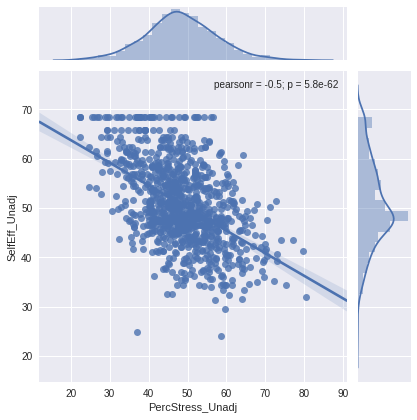

In [58]:
# Test for normality
x = data_emot_SelfEff.PercStress_Unadj.dropna()
y = data_emot_SelfEff.SelfEff_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

dict_sw = {'DF':[len(x) - 1,len(y) - 1],'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1]]}
df = pd.DataFrame(dict_sw,index=['PercStress_Unadj','SelfEff_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.jointplot(x="PercStress_Unadj", y="SelfEff_Unadj",data=data_emot_SelfEff.dropna(),kind="reg");

# Motor Domain

- ### Instrument: Endurance (2 minute walk test)

    - __Endurance_Unadj__: *This test is adapted from the American Thoracic Society’s 6-Minute Walk Test Protocol. This test measures sub-maximal cardiovascular endurance by recording the distance that the participant is able to walk on a 50-foot (out and back) course in 2 minutes. The participant’s raw score is the distance in feet and inches walked in 2 minutes. The test overall takes approximately 4 minutes to administer (with instructions and practice). This test is recommended for ages 3-85.*

In [59]:
behav_mot_Endur = ["Endurance_Unadj"]
data_mot_Endur= data.get(behav_mot_Endur)
data_mot_Endur.describe()

,Endurance_Unadj
count,969.000000
mean,109.022105
std,12.041593
min,78.610000
25%,101.030000
50%,107.720000
75%,116.570000
max,145.170000


Shapiro-test


,DF,Test Statistic,p-value
Endurance_Unadj,968,0.992159,0.000052


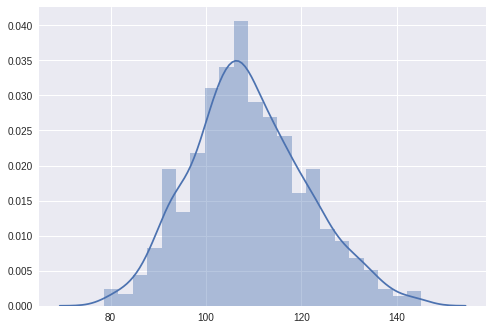

In [60]:
x = data_mot_Endur.Endurance_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Endurance_Unadj']))

# Plot distribution
sns.distplot(data_mot_Endur.Endurance_Unadj.dropna().as_matrix());

Shapiro-test


,DF,Test Statistic,p-value
Endurance_AgeAdj,968,0.996366,0.02383


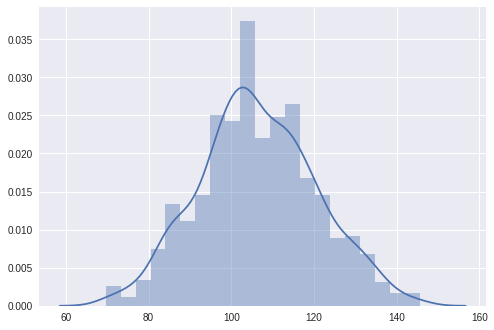

In [61]:
behav_mot_Endur = ["Endurance_AgeAdj"]
data_mot_Endur= data.get(behav_mot_Endur)
x = data_mot_Endur.Endurance_AgeAdj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Endurance_AgeAdj']))

# Plot distribution
sns.distplot(data_mot_Endur.Endurance_AgeAdj.dropna().as_matrix());

- ### Instrument: Locomotion

    - __GaitSpeed_Comp__ : *This test is adapted from the 4-meter walk test in the Short Physical Performance Battery. Participants are asked to walk a short distance (four meters) at their usual pace. Participants complete one practice and then two timed trials. Raw scores are recorded as the time in seconds required to walk 4 meters on each of the two trials, with the better trial used for scoring. The test takes approximately three minutes to administer (including instructions and practice). This test is recommended for ages 7-85. Computed scores are in meters per second.*

In [62]:
behav_mot_Locom = ["GaitSpeed_Comp"]
data_mot_Locom= data.get(behav_mot_Locom)
data_mot_Locom.describe()

,GaitSpeed_Comp
count,970.000000
mean,1.324670
std,0.195285
min,0.790000
25%,1.180000
50%,1.320000
75%,1.450000
max,2.000000


Shapiro-test


,DF,Test Statistic,p-value
GaitSpeed_Comp,969,0.991576,0.000024


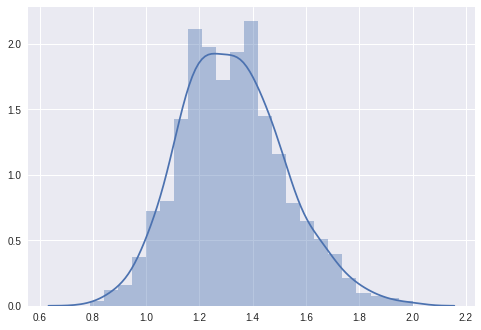

In [63]:
x = data_mot_Locom.GaitSpeed_Comp.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['GaitSpeed_Comp']))

# Plot distribution
sns.distplot(data_mot_Locom.GaitSpeed_Comp.dropna().as_matrix());

- ### Instrument: Dexterity (9-hole Pegboard)

    - __Dexterity_Unadj__: *This simple test of manual dexterity records the time required for the participant to accurately place and remove 9 plastic pegs into a plastic pegboard. The protocol includes 1 practice and 1 timed trial with each hand. Raw scores are recorded as time in seconds that it takes the participant to complete the task with the dominant hand. The test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [64]:
behav_mot_Dexte = ["Dexterity_Unadj"]
data_mot_Dexte= data.get(behav_mot_Dexte)
data_mot_Dexte.describe()

,Dexterity_Unadj
count,970.000000
mean,112.447814
std,10.866102
min,81.530000
25%,104.900000
50%,112.190000
75%,120.317500
max,148.670000


Shapiro-test


,DF,Test Statistic,p-value
Dexterity_Unadj,969,0.997475,0.1395


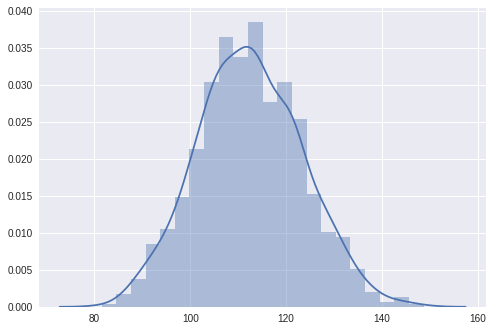

In [65]:
x = data_mot_Dexte.Dexterity_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Dexterity_Unadj']))

# Plot distribution
sns.distplot(data_mot_Dexte.Dexterity_Unadj.dropna().as_matrix());

- ### Instrument: Strength (Grip Strength Dynamometry)

    - __Strength_Unadj__:*This protocol is adapted from the grip strength testing protocol of the American Society of Hand Therapy. Participants are seated in a chair with their feet touching the ground. With the elbow bent to 90 degrees and the arm against the trunk, wrist at neutral, participants squeeze the Jamar Plus Digital dynamometer as hard as they can for a count of three. The dynamometer provides a digital reading of force in pounds. A practice trial at less than full force and 1 test trial are completed with each hand.
The Grip Strength Test provides a score for each hand, with the primary Toolbox score being the number of pounds of force the participant was able to generate using his/her dominant hand.
The test takes approximately 3 minutes to administer and is recommended for ages 3-85.*

In [66]:
behav_mot_Stren = ["Strength_Unadj"]
data_mot_Stren= data.get(behav_mot_Stren)
data_mot_Stren.describe()

,Strength_Unadj
count,969.000000
mean,116.464737
std,11.419426
min,55.290000
25%,107.620000
50%,115.090000
75%,124.270000
max,154.010000


Shapiro-test


,DF,Test Statistic,p-value
Strength_Unadj,968,0.975877,1.353265e-11


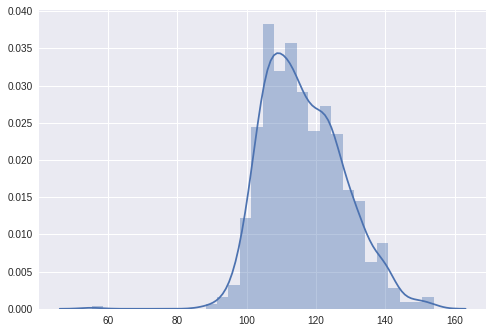

In [67]:
x = data_mot_Stren.Strength_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Strength_Unadj']))

# Plot distribution
sns.distplot(data_mot_Stren.Strength_Unadj.dropna().as_matrix());

Shapiro-test


,DF,Test Statistic,p-value
Strength_AgeAdj,968,0.959906,1.203801e-15


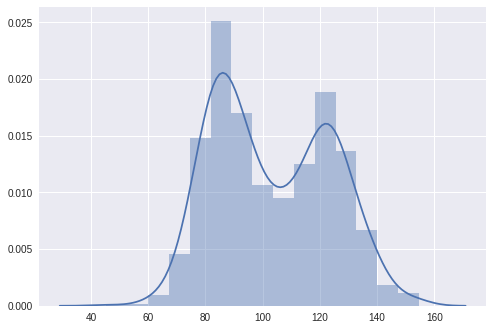

In [68]:
behav_mot_Stren = ["Strength_AgeAdj"]
data_mot_Stren= data.get(behav_mot_Stren)
x = data_mot_Stren.Strength_AgeAdj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Strength_AgeAdj']))

# Plot distribution
sns.distplot(data_mot_Stren.Strength_AgeAdj.dropna().as_matrix());

# Sensory Domain

- ### Instrument: Audition (Words in Noise)

    - __Noise_Comp__: *This automated audiometric test measures hearing thresholds at six different frequencies (.5, 1, 2, 4, 6 and 8 kHz), separately in the left and right ears. On each trial, the participant’s task is to detect whether a pure tone was presented via headphones by answering yes (tone heard) or no (tone not heard). This test takes approximately nine minutes to administer and is recommended for ages 6-85. Based on the participant’s responses, the computer software automatically scores each trial at each of the frequencies for left and right ears, determining the hearing threshold (in decibels)—that is, the level below which the participant cannot hear the tone.To provide a unifying score for Toolbox users, a single hearing metric is provided that is commonly used: a Pure Tone Average (PTA). This is calculated by averaging the threshold scores of 1, 2 and 4 kHz frequencies. Scores for each ear are calculated, with the PTA from the better ear reported as the primary score (i.e., the ear with the lower PTA).*

In [69]:
behav_sens_Audi = ["Noise_Comp"]
data_sens_Audi= data.get(behav_sens_Audi)
data_sens_Audi.describe()

,Noise_Comp
count,944.000000
mean,-5.521186
std,30.766597
min,-99.000000
25%,3.600000
50%,4.400000
75%,5.200000
max,14.000000


Shapiro-test


,DF,Test Statistic,p-value
Noise_Comp,943,0.379602,0.0


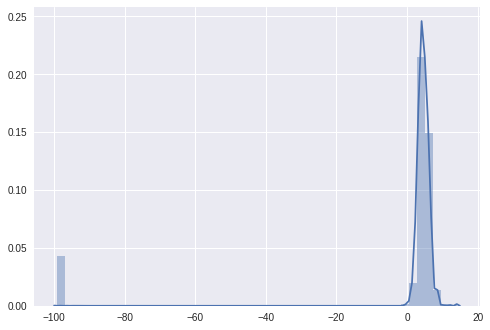

In [70]:
x = data_sens_Audi.Noise_Comp.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Noise_Comp']))

# Plot distribution
sns.distplot(data_sens_Audi.Noise_Comp.dropna().as_matrix());

- ### Instrument: Olfaction (Odor Identification Test)

    - __Odor_Unadj__: *Test the ability to detect odors, to recognize and discriminate odor qualities, and to identify the sources of odors in our world.Age 10+*

In [71]:
behav_sens_Olfa = ["Odor_Unadj"]
data_sens_Olfa = data.get(behav_sens_Olfa)
data_sens_Olfa.describe()

,Odor_Unadj
count,968.000000
mean,111.005816
std,8.957944
min,82.740000
25%,101.120000
50%,108.790000
75%,122.250000
max,122.250000


Shapiro-test


,DF,Test Statistic,p-value
Odor_Unadj,967,0.836056,2.125936e-30


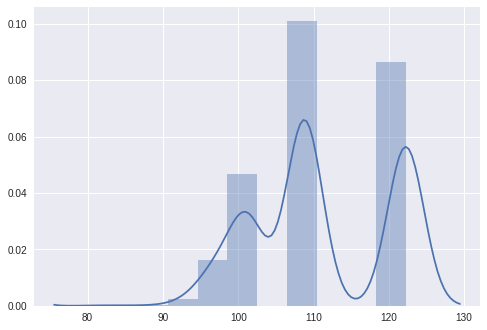

In [72]:
x = data_sens_Olfa.Odor_Unadj.dropna()
shapiro_results = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
print('Shapiro-test')
display(pd.DataFrame(dict_sw,index=['Odor_Unadj']))

# Plot distribution
sns.distplot(data_sens_Olfa.Odor_Unadj.dropna().as_matrix());

- ### Instrument: Pain (Pain Intensity and Interference Surveys)

    - __PainIntens_RawScore__: *This measure consists of a single item measuring immediate (i.e., acute) pain in adults. It asks a participant to rate level of pain experienced “over the last seven days.” It takes less than one minute to administer and is recommended for ages 18-85.Scoring Process: The single item is simply scored on a 0-10 scale, with 0 representing no pain, and 10 representing the “worst imaginable pain.” No derived scores are available.* (Excluded currently due to glich in the Toolbox data download)
    
    - __PainInterf_Tscore__: *This brief self-report scale measures the degree to which pain interferes with other activities in life in adults. Pain interference items were developed as part of the NIH PROMIS. This measure is administered as a CAT and takes approximately three minutes. It is recommended for ages 18-85. Each item administered has a 5-point scale with options ranging from “not at all” to “very much” on questions about how much pain interferes with aspects of one’s life. The survey is scored, and while no Toolbox norms are available for this measure, the scores are converted to general T-scores based on the PROMIS sample to whom this test was given.*

In [73]:
behav_sens_Pain = ["PainInterf_Tscore"]
data_sens_Pain = data.get(behav_sens_Pain)
data_sens_Pain.describe()

,PainInterf_Tscore
count,969.000000
mean,45.761507
std,7.602727
min,38.600000
25%,38.600000
50%,45.900000
75%,52.200000
max,75.300000


Shapiro-test


,DF,Test Statistic,p-value
PainInterf_Tscore,968,0.836056,2.125936e-30


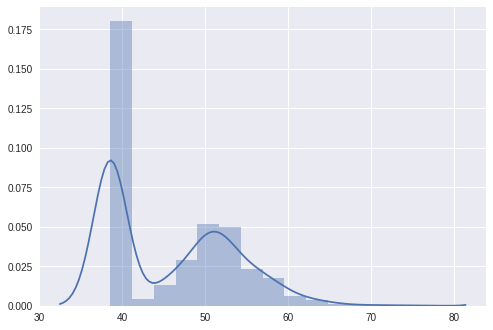

In [74]:
# Test for normality
x = data_sens_Pain.PainInterf_Tscore.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['PainInterf_Tscore'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_Pain.PainInterf_Tscore.dropna().as_matrix());

- ### Instrument: Taste (Taste Intensity Test)

    - __Taste_Unadj__: *NIH Toolbox Regional Taste Intensity Age 12+ Unadjusted Scale Score. Measures perceived intensity of quinine and salt administered in liquid solutions. Participants rate intensity by touching the screen at any point on the scale from "Strongest imaginable" to "No sensation".*

In [75]:
behav_sens_Taste = ["Taste_Unadj"]
data_sens_Taste = data.get(behav_sens_Taste)
data_sens_Taste.describe()

,Taste_Unadj
count,966.000000
mean,95.092464
std,14.522400
min,56.350000
25%,84.070000
50%,95.360000
75%,104.660000
max,134.650000


Shapiro-test


,DF,Test Statistic,p-value
Taste_Unadj,965,0.836056,2.125936e-30


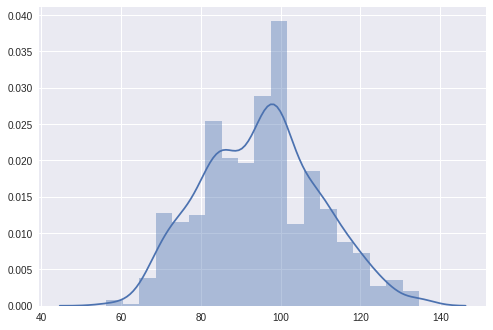

In [76]:
# Test for normality
x = data_sens_Taste.Taste_Unadj.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['Taste_Unadj'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_Taste.Taste_Unadj.dropna().as_matrix());

- ### Instrument: Contrast Sensitivity (Mars Contrast Sensitivity)

    - __Mars_Final__: *Contrast sensitivity is measured using the Mars Contrast Sensitivity Test (Arditi et al. 2005), a brief, valid and reliable measure that improves upon the traditional Pelli-Robson measure (Dougherty et al. 2005; Haymes et al. 2006; Thayaparan et al. 2007).*

In [77]:
behav_sens_ContrSens = ["Mars_Final"]
data_sens_ContrSens = data.get(behav_sens_ContrSens)
data_sens_ContrSens.describe()

,Mars_Final
count,962.000000
mean,1.794272
std,0.065747
min,1.080000
25%,1.760000
50%,1.800000
75%,1.840000
max,1.920000


Shapiro-test


,DF,Test Statistic,p-value
Mars_Final,961,0.836056,2.125936e-30


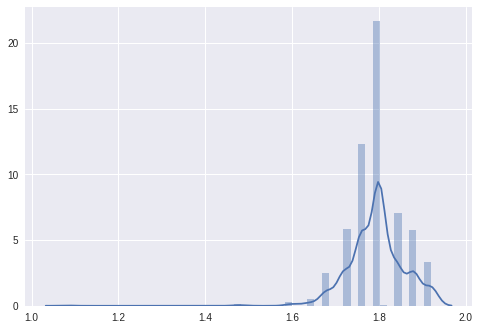

In [78]:
# Test for normality
x = data_sens_ContrSens.Mars_Final.dropna()
shapiro_results_x = scipy.stats.shapiro(x)

dict_sw = {'DF':[len(x) - 1],'Test Statistic': [shapiro_results[0]],'p-value': [shapiro_results[1]]}
df = pd.DataFrame(dict_sw,index=['Mars_Final'])
print('Shapiro-test')
display(df)

# Plot distribution
sns.distplot(data_sens_ContrSens.Mars_Final.dropna().as_matrix());

# Personality domain

- ### Instrument: Five Factor Model (NEO-FFI)

    - __NEOFAC_A__: *Personality Agreeableness*
    - __NEOFAC_O__: *Personality Openness*
    - __NEOFAC_C__: *Personality Conscientiousness*
    - __NEOFAC_N__: *Personality Neuroticism*
    - __NEOFAC_E__: *Personality Extroversion*

In [79]:
behav_perso_FiveFac = ["NEOFAC_A","NEOFAC_O","NEOFAC_C",
                     "NEOFAC_N","NEOFAC_E"]
data_perso_FiveFac= data.get(behav_perso_FiveFac)
data_perso_FiveFac.describe()

,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E
count,965.000000,965.000000,965.000000,965.000000,965.000000
mean,31.843523,28.089119,34.539896,16.618653,30.678756
std,5.059949,6.193151,5.900604,7.161856,5.986535
min,13.000000,9.000000,12.000000,0.000000,11.000000
25%,29.000000,24.000000,31.000000,12.000000,27.000000
50%,32.000000,27.000000,35.000000,16.000000,31.000000
75%,35.000000,32.000000,38.000000,21.000000,35.000000
max,45.000000,45.000000,48.000000,43.000000,47.000000


Shapiro-test


,DF,Test Statistic,p-value
NEOFAC_A,964,0.991357,1.951373e-05
NEOFAC_O,964,0.990121,4.422365e-06
NEOFAC_C,964,0.988764,9.582980e-07
NEOFAC_N,964,0.987155,1.763407e-07
NEOFAC_E,964,0.992050,4.679194e-05


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


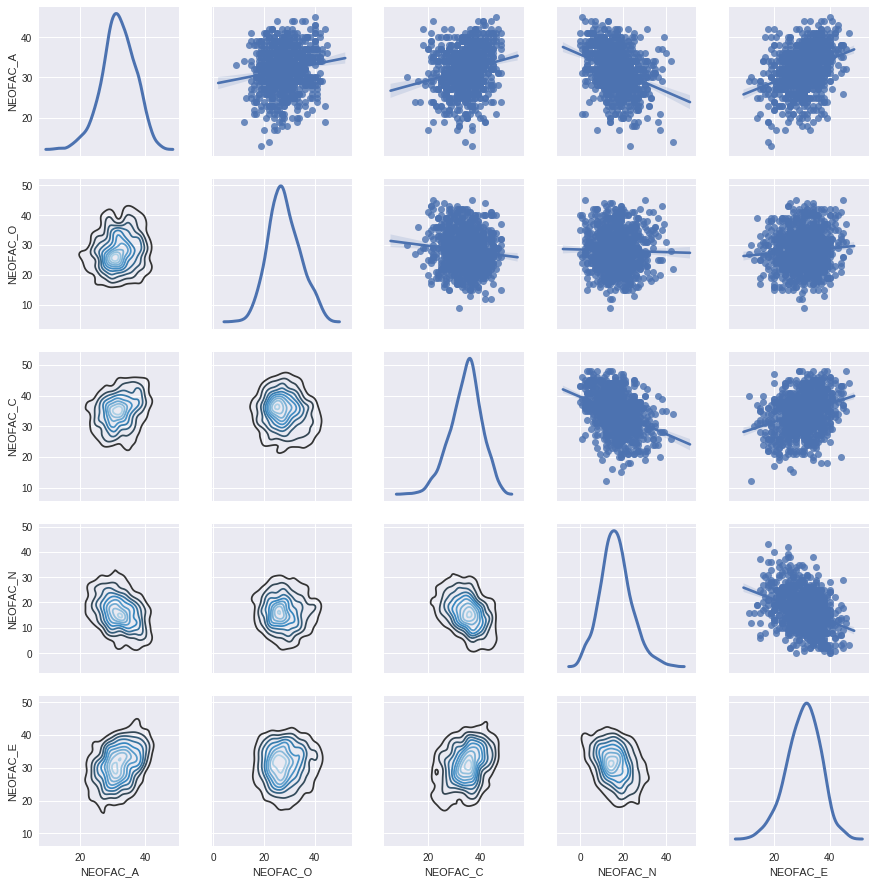

In [80]:
# Test for normality
x = data_perso_FiveFac.NEOFAC_A.dropna()
y = data_perso_FiveFac.NEOFAC_O.dropna()
z = data_perso_FiveFac.NEOFAC_C.dropna()
u = data_perso_FiveFac.NEOFAC_N.dropna()
v = data_perso_FiveFac.NEOFAC_E.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)

dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,len(v) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],shapiro_results_z[0],
                             shapiro_results_u[0],shapiro_results_v[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],shapiro_results_z[1],
                      shapiro_results_u[1],shapiro_results_v[1]]}
df = pd.DataFrame(dict_sw,index=['NEOFAC_A','NEOFAC_O','NEOFAC_C',
                                 'NEOFAC_N','NEOFAC_E'])
print('Shapiro-test')
display(df)

# PLot dist
g = sns.PairGrid(data_perso_FiveFac.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

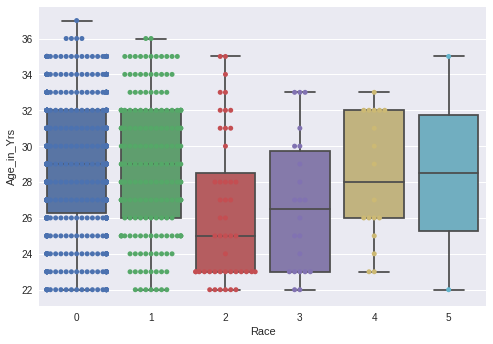

In [81]:
f = plt.figure()
ax = f.add_subplot(111)
sns.swarmplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)
sns.boxplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


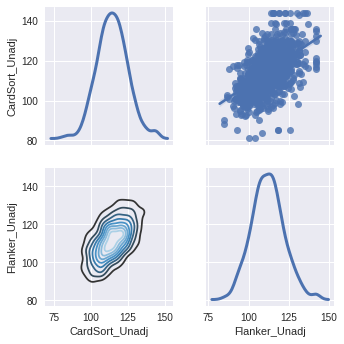

In [82]:
g = sns.PairGrid(data_cog_ExFun.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)